### Question:
What do housing-market indicators say about the socio-economic conditions in different geographical locations, and how can they be used to provide forecasts of future economic conditions?

**Scenario:** USA and Australia are two popular counties for **property investment** on the global wide. As a **property consultant**(My part-time job), I would like to know, what are the correlations bettwen **property market** and the **general socio-economic conditions** for the two countries. 

More importantly, since the world is been through covid-19 crisis, I would like to investigate how the housing market is affected by  **national crisis**, for example, **2008 financial crisis**. Based on the history, I could get some insights on **how the property market will be infected by the current covid-19 crisis** and give my customers some suggestion on the curret situation.

### Data:

The datasets used in this question are described as follows:
- **GDP**:The general indicator of a country's socio-economic conditions.
- **Norminated House Price**: A direct indicator of a country's housing market.  
- **Long-term Interest Rate**: A very important indicator for investers/buyers. Also, during crisis, interst rate can be an effective way for goverment to rescue the market.

All the datasets are sources from http://www.oecd.org/ 


In [36]:
# Import the library for data manipulation and plot
import pandas as pd               
import matplotlib.pyplot as plt  
import datetime

In [37]:
#Read the file and observe the data 
#Decide the data cleanning strategy

gdp_data = pd.read_csv('GDP_quertly.csv', parse_dates=['TIME'], infer_datetime_format=True)
print(gdp_data.head)

price_data = pd.read_csv('house_price_quertly.csv', parse_dates=['TIME'], infer_datetime_format=True)
print(price_data.head)

interet_data = pd.read_csv('interest_rate_quertly.csv', parse_dates=['TIME'], infer_datetime_format=True)
interet_data.head

<bound method NDFrame.head of     LOCATION INDICATOR SUBJECT   MEASURE FREQUENCY       TIME     Value  \
0        AUS      QGDP     TOT  PC_CHGPP         Q 1990-04-01  0.134418   
1        AUS      QGDP     TOT  PC_CHGPP         Q 1990-07-01 -0.590346   
2        AUS      QGDP     TOT  PC_CHGPP         Q 1990-10-01  0.579294   
3        AUS      QGDP     TOT  PC_CHGPP         Q 1991-01-01 -1.292161   
4        AUS      QGDP     TOT  PC_CHGPP         Q 1991-04-01 -0.132475   
..       ...       ...     ...       ...       ...        ...       ...   
233      USA      QGDP     TOT  PC_CHGPP         Q 2018-10-01  0.271333   
234      USA      QGDP     TOT  PC_CHGPP         Q 2019-01-01  0.765207   
235      USA      QGDP     TOT  PC_CHGPP         Q 2019-04-01  0.499697   
236      USA      QGDP     TOT  PC_CHGPP         Q 2019-07-01  0.521779   
237      USA      QGDP     TOT  PC_CHGPP         Q 2019-10-01  0.527469   

     Flag Codes  
0           NaN  
1           NaN  
2           NaN

<bound method NDFrame.head of     LOCATION INDICATOR SUBJECT MEASURE FREQUENCY       TIME      Value  \
0        AUS     LTINT     TOT   PC_PA         Q 1990-10-01  12.550000   
1        AUS     LTINT     TOT   PC_PA         Q 1991-01-01  11.476670   
2        AUS     LTINT     TOT   PC_PA         Q 1991-04-01  10.966670   
3        AUS     LTINT     TOT   PC_PA         Q 1991-07-01  10.656670   
4        AUS     LTINT     TOT   PC_PA         Q 1991-10-01   9.663333   
..       ...       ...     ...     ...       ...        ...        ...   
231      USA     LTINT     TOT   PC_PA         Q 2019-01-01   2.653333   
232      USA     LTINT     TOT   PC_PA         Q 2019-04-01   2.333333   
233      USA     LTINT     TOT   PC_PA         Q 2019-07-01   1.796667   
234      USA     LTINT     TOT   PC_PA         Q 2019-10-01   1.793333   
235      USA     LTINT     TOT   PC_PA         Q 2020-01-01   1.376667   

     Flag Codes  
0           NaN  
1           NaN  
2           NaN  
3        

In [38]:
gdp_data.info()
price_data.info()
interet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
LOCATION      238 non-null object
INDICATOR     238 non-null object
SUBJECT       238 non-null object
MEASURE       238 non-null object
FREQUENCY     238 non-null object
TIME          238 non-null datetime64[ns]
Value         238 non-null float64
Flag Codes    0 non-null float64
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 15.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 8 columns):
LOCATION      234 non-null object
INDICATOR     234 non-null object
SUBJECT       234 non-null object
MEASURE       234 non-null object
FREQUENCY     234 non-null object
TIME          234 non-null datetime64[ns]
Value         234 non-null float64
Flag Codes    0 non-null float64
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 14.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (to

In [39]:
#get the locations of the dataset
print(gdp_data['LOCATION'].unique())
print(price_data['LOCATION'].unique())
print(interet_data['LOCATION'].unique())

['AUS' 'USA']
['AUS' 'USA']
['AUS' 'USA']


### Data cleanning
From observation we found that:
1. The three seperate datasets describe the GDP, House price and Interest rate **in quartly** for Australia and USA during the past 20 years. 
2. The datasets are **relatively clean**: there is no null values in our datasets, but the number of objects in each dataset is slightly different.
3. Each dataset contains servaral **redundant columns** that needs to be removed.  
4. The key of the data sets are the same, which can be used to **merge the three dataset into one**. 

In [40]:
#This csv contains a lot colums that we don't need 
#Instead of drop columns, we create a subset with only useful columns.
subset1 = gdp_data[['LOCATION', 'TIME','Value']]
subset2 = price_data[['LOCATION', 'TIME','Value']]
subset3= interet_data[['LOCATION', 'TIME','Value']]

#Then we join the three datasets into one clean dataset for further analysis
# here inner merge will be choose, since inner join use the intersaction of the keys.
merge1 = pd.merge(subset1, subset2, how='inner', on=['LOCATION', 'TIME'])
clean_data = pd.merge(merge1, subset3,how='inner', on=['LOCATION', 'TIME'])

#now we can see there are only AUS and USA data 
#we change the col name to make it clear
clean_data = clean_data.rename(columns={'Value_x': 'GDP', 'Value_y': 'House_price', 'Value':'Interest_rate'})
print(clean_data)

#get all the unique dates (if there are more than what we can count)
all_dates = clean_data.loc[:, 'TIME'].dt.year.unique()
print(all_dates)

#check is there any null value in the clean dataset by print data-info
clean_data.info()

    LOCATION       TIME       GDP  House_price  Interest_rate
0        AUS 1990-10-01  0.579294    22.915779      12.550000
1        AUS 1991-01-01 -1.292161    22.951014      11.476670
2        AUS 1991-04-01 -0.132475    23.236291      10.966670
3        AUS 1991-07-01  0.414660    24.002799      10.656670
4        AUS 1991-10-01  0.069077    23.925783       9.663333
..       ...        ...       ...          ...            ...
229      USA 2018-10-01  0.271333   122.249717       3.033333
230      USA 2019-01-01  0.765207   123.928679       2.653333
231      USA 2019-04-01  0.499697   125.357878       2.333333
232      USA 2019-07-01  0.521779   126.879582       1.796667
233      USA 2019-10-01  0.527469   128.479915       1.793333

[234 rows x 5 columns]
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data c

In [41]:
# Since we want to see the overall trend of the dataset, here we create a new column call 'Year' for later manipulation. 
clean_data['Year'] = clean_data['TIME'].dt.year
clean_data

,LOCATION,TIME,GDP,House_price,Interest_rate,Year
0,AUS,1990-10-01,0.579294,22.915779,12.550000,1990
1,AUS,1991-01-01,-1.292161,22.951014,11.476670,1991
2,AUS,1991-04-01,-0.132475,23.236291,10.966670,1991
3,AUS,1991-07-01,0.414660,24.002799,10.656670,1991
4,AUS,1991-10-01,0.069077,23.925783,9.663333,1991
...,...,...,...,...,...,...
229,USA,2018-10-01,0.271333,122.249717,3.033333,2018
230,USA,2019-01-01,0.765207,123.928679,2.653333,2019
231,USA,2019-04-01,0.499697,125.357878,2.333333,2019
232,USA,2019-07-01,0.521779,126.879582,1.796667,2019


### Cleanning

- The final clean dataset containes both the **quarterly and annual values** of the GDP, House Price and interest_rate of AUS and USA in the **past 20 years(1990-2019)**

- Since we are interested about the **comparison between AUS and USA**, a **further cleanning** will be done to extract the dataset for the two countries, followed by some plots. 


In [42]:
# Now we got a clean dataset with all the values we want for the two countries, the further step is to get the data for AUS and USA and make some plots.
#Check whether we have same dimension for the two locations(if there are more than what we can count)
Num_AUS = clean_data[(clean_data['LOCATION'] == 'AUS')].count()
Num_USA = clean_data[(clean_data['LOCATION'] == 'USA')].count()

print(Num_AUS[0])
print(Num_USA[0])

117
117


In [43]:
#Set index to location for the loc function, we want to get index for each coutry(AUS/USA)
clean_data = clean_data.set_index('LOCATION')
#Get index of each country for later plotting
AUS_index = clean_data.loc[ 'AUS' , : ]
USA_index = clean_data.loc[ 'USA' , : ]

### Cleanning
- Now we have the two dataset (AUS_index and USA_index )with all three variables for AUS and USA separatly. 
- Since we want to see the overall trendency and correlation between the variables, instead of using quarterly data, we group the data by year and **calculate the mean value of four quarters as the annual data** 

In [44]:
#Get the yearly data for AUS
AUS_GDP = AUS_index.groupby('Year')['GDP'].mean()
AUS_HouPrice = AUS_index.groupby('Year')['House_price'].mean()
AUS_intrate = AUS_index.groupby('Year')['Interest_rate'].mean()

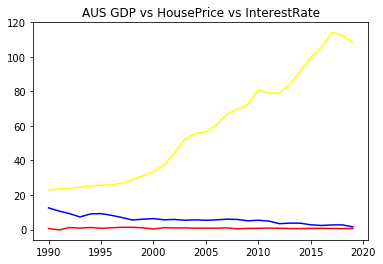

In [45]:
# try to do some plot and inspect the correlations between variables for both AUS and USA.
plt.plot(AUS_GDP, color ='red')
plt.plot(AUS_HouPrice, color ='yellow') 
plt.plot(AUS_intrate, color ='blue') 
plt.title('AUS GDP vs HousePrice vs InterestRate')
plt.show()


### Analysis
- It seems that there are **linear correlations** between the three variables of AUS. To further investigate this relationship, we plot it in two axis to **normalize the data scale**.

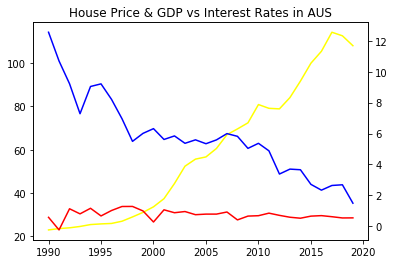

In [46]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(AUS_HouPrice, color ='yellow') 

ax2 = ax1.twinx()
ax2.plot(AUS_GDP, color ='red')
ax2.plot(AUS_intrate, color ='blue') 

plt.title('House Price & GDP vs Interest Rates in AUS')
plt.show()

In [47]:
#Get the yearly data for USA
USA_GDP = USA_index.groupby('Year')['GDP'].mean()
USA_HouPrice = USA_index.groupby('Year')['House_price'].mean()
USA_intrate = USA_index.groupby('Year')['Interest_rate'].mean()

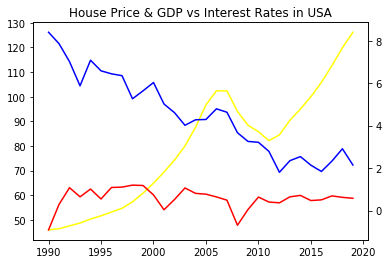

In [48]:
# make the plot for USA as well 
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(USA_HouPrice, color ='yellow') 

ax2 = ax1.twinx()
ax2.plot(USA_GDP, color ='red')
ax2.plot(USA_intrate, color ='blue') 

plt.title('House Price & GDP vs Interest Rates in USA')
plt.show()

### Interpretations：
There are some findings we can get from the two plots above:

- General **Linear correlations** can be seen between House_price, GDP and interest_rate (though the directions are different) from both AUS and USA plots. However, the linear correlations are **more obvious of AUS variables**. Later we will build a **linear regression model** to evaluate this correlation. 

- The interest rate of both AUS and USA have been generally decreasing among the 20 years. For AUS, a **positive linear correlation** can be seen between interest rate and house price, which is consistent with our common knowledge. However, for USA, during around 2007-2011, the **house price dropped along with interest rate**. We assume it is due to the **side effect of the 2008 financial crisis**. People can no longer afford the properties even when the interest rate and price go down.  

- There are **more fluctuation of USA plot** than AUS,especially during 2008 financial crisis. It seems that **AUS GDP and house price are less affected by the crisis** compared with USA. To further investigate this finding, a comparison of the data between the two coutries will be made. 


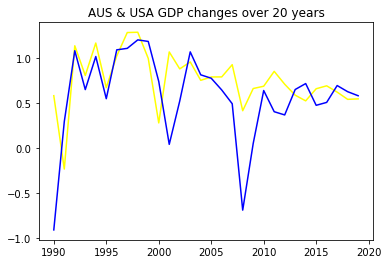

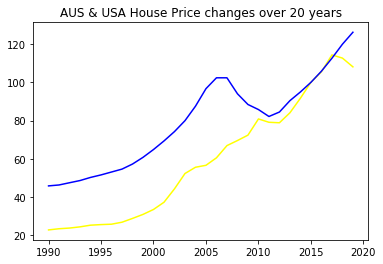

In [49]:
# To further explore finding2, we will make plots to compare the GDP and House_price between AUS and USA
# make the plot to compare the GDP trend over time 
fig = plt.figure()
plt.plot(AUS_GDP, color ='yellow') 
plt.plot(USA_GDP, color ='blue') 
plt.title('AUS & USA GDP changes over 20 years')
plt.show()

# make the plot to compare the house price trend over time 
fig = plt.figure()
plt.plot(AUS_HouPrice, color ='yellow') 
plt.plot(USA_HouPrice, color ='blue') 
plt.title('AUS & USA House Price changes over 20 years')
plt.show()


### Interpretations：

- From the plots, we can see clearly that there are **huge drops of USA's gdp and house price after 2008 financial crisis**. By contrast, this negative effect are **much smoother for AUS**. Thus, we can say that, compared with USA, **AUS performs better when encourter crisis/risks**. This may because the USA market is much bigger and free than AUS.  

- We also want to know what the **mediating role of interest rate** was playing during Australia 2008 financial crisis. This may give us a hint on the future property market trend after covid-19.

In [50]:
# Extract the data from Australian during 2007 -2009
AUS_ThreeYeardata = AUS_index[(AUS_index['TIME'].dt.year > 2006) & (AUS_index['TIME'].dt.year < 2010)]
AUS_ThreeYeardata

,TIME,GDP,House_price,Interest_rate,Year
LOCATION,,,,,
AUS,2007-01-01,1.489092,63.265735,5.807896,2007
AUS,2007-04-01,0.586955,65.733730,6.011781,2007
AUS,2007-07-01,1.116082,68.310055,6.022596,2007
AUS,2007-10-01,0.500482,70.531545,6.135811,2007
AUS,2008-01-01,1.131335,71.314318,6.152160,2008
AUS,2008-04-01,0.222517,70.285282,6.370742,2008
AUS,2008-07-01,0.778600,69.056732,5.958310,2008
AUS,2008-10-01,-0.483688,67.754317,4.790564,2008
AUS,2009-01-01,1.033833,67.965242,4.222159,2009


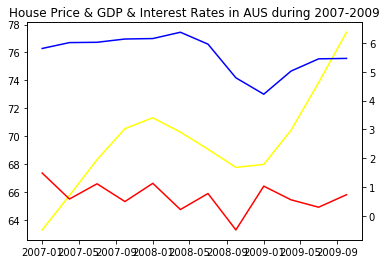

In [51]:
# Make plots for the three year data
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(AUS_ThreeYeardata['TIME'], AUS_ThreeYeardata['House_price'], color ='yellow') 

ax2 = ax1.twinx()
ax2.plot(AUS_ThreeYeardata['TIME'], AUS_ThreeYeardata['GDP'], color ='red')
ax2.plot(AUS_ThreeYeardata['TIME'], AUS_ThreeYeardata['Interest_rate'], color ='blue') 

plt.title('House Price & GDP & Interest Rates in AUS during 2007-2009')
plt.show()


### Interpretations：
- Surprisingly, the interest rate actually has been through **an increase then drop** during the three years around financial crisis. 

- The GDP started to be affected by financial crisis from 2008 Q2, since the GDP droped from last quarter 1.131335 to 0.222517. Before that, the **interest rate has been rising from 5.8 to 6.3, and remain at a very high level**. 

- At the same time, the house price increased from 63 to 71 units, which has increased around **2 units** per quarter. This may **allow more speculator come to the market** and cause invisiable high risks for the breakout of financial crisis. 

- The interest rate started to drop from 2008 Q3 until 2009 Q1. During these months, the house price has been through a drop for **9 months** then started to **soar again** with around **3 units** per quarter. 

- The fact is that, **although the house price slightly dropped during 2008, the Australian housing market actually prospered shortly after the crisis!**


In [52]:
# To predict the future socio-economic conditions from housing market indicators,we shall build a linear regression model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [53]:
# define a function to train and plot a linear regression model for given X,y two variables
def train_plot_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size=0.2, random_state=0)
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    
    print('The linear model is:+ Y = {:.5} + {:.5}X'.format(regressor.intercept_[0], regressor.coef_[0][0]))
    print('Coefficients: \n', regressor.coef_)
# The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(y_test, predictions))

# Plot outputs
    plt.scatter(X_test, y_test,  color='black')
    plt.plot(X_test, predictions, color='blue', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show()

The linear model is:+ Y = 0.91899 + -0.0035797X
Coefficients: 
 [[-0.00357967]]
Mean squared error: 0.43
Coefficient of determination: 0.04


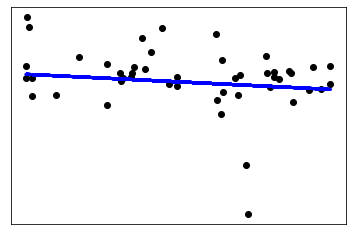

In [54]:
# Build a linear regression model of house price and gdp
train_plot_model(clean_data[ 'House_price'],clean_data['GDP'] )

The linear model is:+ Y = 126.49 + -11.284X
Coefficients: 
 [[-11.28357541]]
Mean squared error: 131.75
Coefficient of determination: 0.83


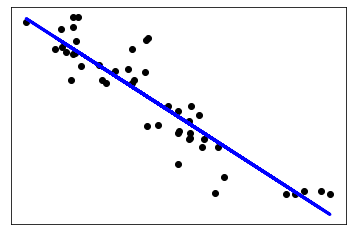

In [55]:
# Build a linear regression model of interest rate and house price
train_plot_model(clean_data[ 'Interest_rate'],clean_data['House_price'])

The linear model is:+ Y = 0.55932 + 0.021992X
Coefficients: 
 [[0.02199249]]
Mean squared error: 0.44
Coefficient of determination: 0.02


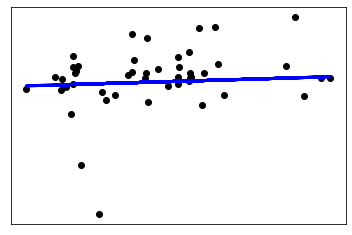

In [56]:
# Build a linear regression model of interest rate and GDP
train_plot_model(clean_data[ 'Interest_rate'],clean_data['GDP'] )

### Interpretations：

- We have printed the **Coefficients,Mean squared error and Coefficient of determination(R2)** between each variable pairs in above. These indicators help us to evaluate the correlations and performance of the models. 

- Coefficients describe the relationship/direction between a predictor variable and the response variable. Mean Squared Error (MSE) measures the average squared difference between the estimated values and the actual value. Coefficient of determination(R2) indicates the proportion of the variance in the dependent variable (Y) that is predicted by linear regression.

- The Coefficients and R2 of 'house_price and GDP' and 'interest rate and GDP' are very small,this indicates that **'house_price' and 'interest rate' may not be the strong/direct indicators of GDP**.

- The R2 for 'interest rate and house price'is up to 0.83 which is very close to the perfect fit(100%). Also, the Coefficients for this model is quite high(up to -11), **indicating a strong linear correlation in between**. However, the Mean squared error for this linear regression is also very high (131.75).This may because there are many **outliers** in our dataset. 



### Analysis and discussion

- To summarize, from the GDP, interest rate and house price data in the past 20 years we can see that there are linear correlations in between the variables, this can be used for predicting the future socio-economical conditions of a country. 

- From the comparison of USA and AUS we can see that, AUS were less affected by the global financial crisis, this may because the USA economics is much bigger than AUS. In other ways, We can say that AUS is safer for long term property investment.

- Dring 2020 covid-19, the govenrment has took earlier actions to reduce the interest rate and  provide financial assisstance. Based on the analysis from 2008 financial crisis, we predict that there is unlikely a huge drop of house price of AUS property market this time. This gives us more confidence when facing the current situation. Although the market will be, more or less, negatively affected by covid-19, we believe it will recover soon. 


### Future Work

- To improve the performance of our model and predict the future GDP trendency, other stronger indicators(maybe second industry data) can be added to enhence the result. This could be achieved from a multiple linear regression model. 


### References:




https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/
